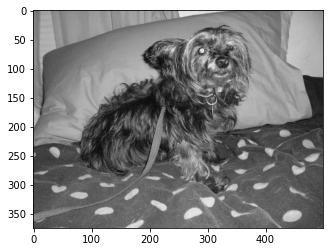

[[117 117 119 ... 133 132 132]
 [118 117 119 ... 135 134 134]
 [119 118 120 ... 137 136 136]
 ...
 [ 79  74  73 ...  80  76  73]
 [ 78  72  69 ...  72  73  74]
 [ 74  71  70 ...  75  73  71]] 

pixel values
 image dimensions:  (375, 500)


In [51]:
# for reference

import numpy # use numpy 1.19.3 because it crashes if you use latest
from matplotlib import pyplot
import os
import cv2 # uses pip version of cv2, there's a more up to date version on the website
from tqdm import tqdm

DATADIR = "images" # point to w/e you have it I have it in the same directory for now
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
        pyplot.imshow(img_array, cmap='gray')
        pyplot.show()
        print (img_array, "\n\npixel values\n", "image dimensions: ", img_array.shape) # the values for the image
        break
    break

Reduces the resolution from `500x375 pixels` to `50x50 pixels`

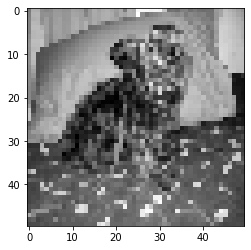

In [52]:
IMG_SIZE = 50
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
pyplot.imshow(new_array, cmap='gray')
pyplot.show()


Use the code from before and do the processing for the first image we did to every image we have.

In [53]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category) # labels the folder in index (0 or 1) = dog/cat

        # this was in the jupyter notebook by the professor
        # throws an error for god knows what reason, the try catch just ignores it
        # I assume there's some images that don't meet the 50x50 size
        # tqdm is a progress bar display
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) # read the image
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # resize to 50x50 pixels for every image
                training_data.append([new_array, class_num]) # labels the categories for the images to cat or dog and append to the array
            except Exception:
                pass

create_training_data() # in a function just so that it doesn't affect the ones from before

print(len(training_data))



    

100%|██████████| 500/500 [00:00<00:00, 704.22it/s]999



In [54]:
import random

random.shuffle(training_data) # shuffles the images so it wouldnt be in order

x = []
y = []

for features, label in training_data:
    x.append(features)
    y.append(label)

print(x[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
x = numpy.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # reshape all images to that format

[[[[220]
   [220]
   [220]
   ...
   [238]
   [238]
   [238]]

  [[220]
   [220]
   [220]
   ...
   [236]
   [238]
   [238]]

  [[220]
   [220]
   [220]
   ...
   [236]
   [236]
   [236]]

  ...

  [[221]
   [219]
   [219]
   ...
   [208]
   [210]
   [206]]

  [[217]
   [223]
   [223]
   ...
   [209]
   [213]
   [196]]

  [[215]
   [219]
   [219]
   ...
   [215]
   [213]
   [212]]]]


In [55]:
numpy.shape(x) # first number means number of images in the array, 2nd and 3rd is dimensions for the pictures

(999, 50, 50, 1)

Save data to pickle files

In [56]:
import pickle

pickle_out = open("x_data.pickle","wb") # write binary
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("y_data.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

Read data from the pickle files

In [57]:
import pickle

pickle_in = open("x_data.pickle","rb") # read binary
x = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open("y_data.pickle","rb")
y = pickle.load(pickle_in)
pickle_in.close()

In [58]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

y = numpy.array(y) # convert it to a numpy array
x = x/255.0 # normalize the values to 0 - 1

# one after another, basically every add is a layer that executes on the 
# data given.
model = Sequential() 


# Convolutional neural networks apply a filter to an input to create a feature map that summarizes the presence of detected features in the input.
# How I imagine it is a mountain with different heights for each bump of a mountain
# Might make a visualizer for this later
model.add(Conv2D(256, (3,3) , input_shape=x.shape[1:])) 

model.add(Activation('relu')) 
# relu = rectified linear unit
# if input is less than 0, return 0, else return the input
model.add(MaxPooling2D(pool_size=(2,2)))

# same code with no input shape
model.add(Conv2D(256, (3,3)))  
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) # converts the 3d feature map to 1d feature vectors
model.add(Dense(64)) # its manipulating vectors, but idk how it does it
model.add(Dense(1))

# One of the most widely used sigmoid functions is the logistic function, which maps any real value to the range (0, 1)
model.add(Activation('sigmoid'))

# so math stuff idk
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# epoch is how many times it goes through the whole data set
# batch is how big the data set from the samples is

# validation_split: Float between 0 and 1. Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. The validation data is selected from the last samples in the x and y data provided, before shuffling.
model.fit(x, y, batch_size=16, epochs=30, validation_split=0.3)

Epoch 1/30
44/44 [==============================] - 11s 259ms/step - loss: 0.7536 - accuracy: 0.5222 - val_loss: 0.7065 - val_accuracy: 0.4833
Epoch 2/30
44/44 [==============================] - 10s 234ms/step - loss: 0.6904 - accuracy: 0.5451 - val_loss: 0.6703 - val_accuracy: 0.5667
Epoch 3/30
44/44 [==============================] - 10s 236ms/step - loss: 0.6674 - accuracy: 0.6052 - val_loss: 0.6658 - val_accuracy: 0.6233
Epoch 4/30
44/44 [==============================] - 10s 228ms/step - loss: 0.6549 - accuracy: 0.6166 - val_loss: 0.6614 - val_accuracy: 0.6467
Epoch 5/30
44/44 [==============================] - 10s 227ms/step - loss: 0.6346 - accuracy: 0.6524 - val_loss: 0.6457 - val_accuracy: 0.6700
Epoch 6/30
44/44 [==============================] - 12s 268ms/step - loss: 0.6007 - accuracy: 0.6767 - val_loss: 0.6530 - val_accuracy: 0.6400
Epoch 7/30
44/44 [==============================] - 11s 261ms/step - loss: 0.5568 - accuracy: 0.7210 - val_loss: 0.6751 - val_accuracy: 0.6033

In [59]:
model.save('trained_model1')

INFO:tensorflow:Assets written to: trained_model1\assets


Testing the model generated

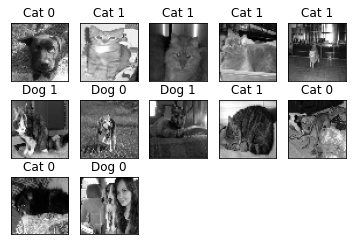

In [64]:
# make a sample from the last 12 images in the array
sample= x[-13:-1]
sample = numpy.array(sample).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
numpy.shape(sample)

sample2= y[-13:-1]

# make a figure
fig = pyplot.figure()
mm = []
num = 0
for data in sample:
    num = num + 1
    img_data = data
    type(data) # idk why this is here

    z = fig.add_subplot(3, 5, num)
    orig = img_data.reshape(IMG_SIZE, IMG_SIZE)
    data = img_data.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    
    mm.append(model.predict(data))

    if mm[num-1] > 0.49: str_label='Cat'
    else: str_label='Dog'

    z.imshow(orig, cmap='gray')

    pyplot.title(str_label + " " + str(sample2[num-1]))
    
    z.axes.get_xaxis().set_visible(False)
    z.axes.get_yaxis().set_visible(False)

The number equals to the actual category of the picture